# Jeu de dé, rotation sur un circuit

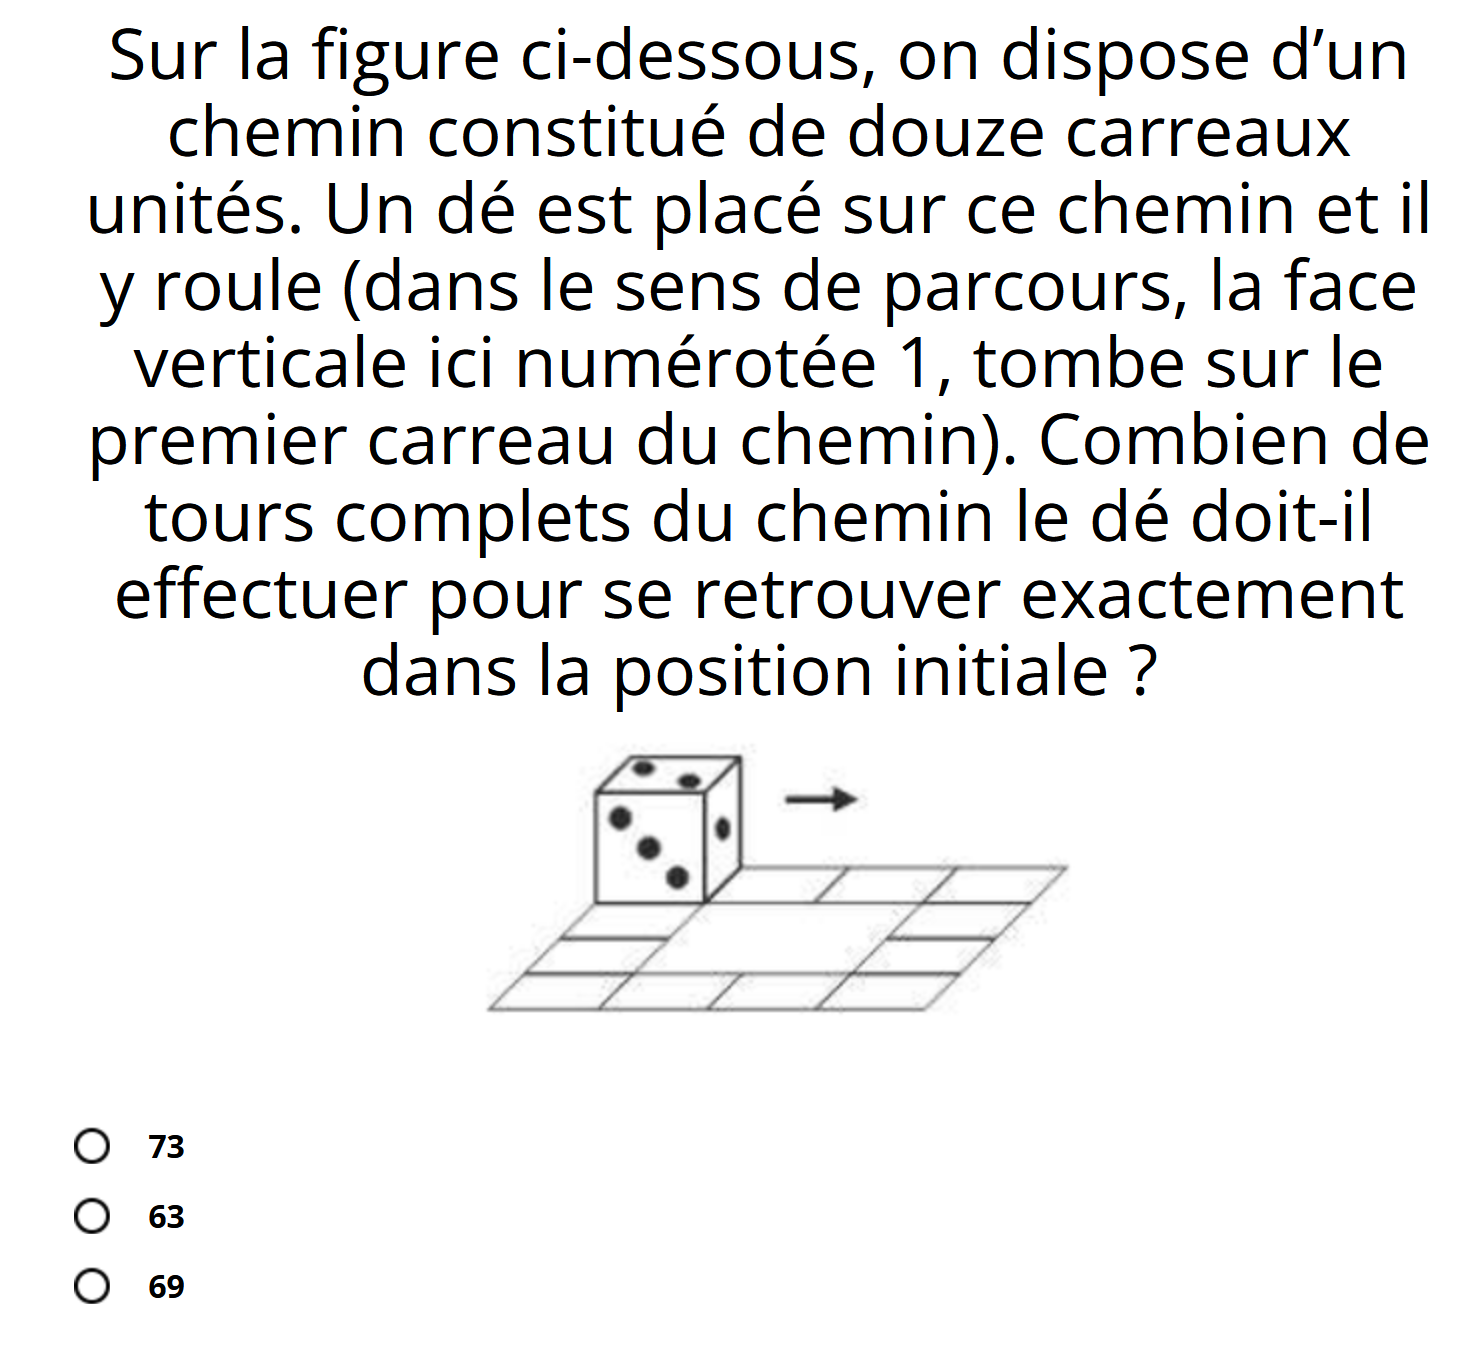

In [1]:
from IPython.display import Image
Image("images/exo_des.png")

Quelques remarques pour commencer. La solution est indépendante de la position initiale. Le dé fait trois rotations dans un sens, trois dans un autre, trois dans le sens opposé au sens précédent, et encore trois. Il faut ensuite comparer la position obtenue avec la position initiale. On peut remarquer que quatre rotations dans un sens et le dé revient dans sa position initiale. Donc trois rotations dans un sens amènent sont équivalente à une rotation dans le sens opposé. Il ne faut plus qu'à représenter les deux rotations. On peut représenter le dé dans sa position initiale comme ceci.

```
    4
2 6 5 1
    3
```

On choisit un tableau pour représenter les faces en les numérotant de 0 à 5 :

```
    4
0 1 2 3
    5
```
Le dé initial est donc : ``2 6 5 1 4 3``. La première rotation fait tourner le dé initiale comme ceci :
```
    4
1 2 6 5
    3
```

Et cela donne : ``1 2 6 5 4 3``. La seconde aboutit à - les faces 1 et 6 ne bougent pas.
```
    5
4 6 3 1
    2
```
Soit ``4 6 3 1 5 2``.

On code donc les deux rotations comme ceci :

In [6]:
def rotation1(de: list[int])->list[int]:
    """
    [2 6 5 1 4 3] -> [1 2 6 5 4 3]
    """
    nouveau_de = de.copy()  # le copie évite de modifier le dé initial
    nouveau_de[1:4] = de[:3]
    nouveau_de[0] = de[3]
    return nouveau_de

def rotation2(de: list[int])->list[int]:
    """
    [2 6 5 1 4 3] -> [4 6 3 1 5 2]
    """
    nouveau_de = de.copy()  # le copie évite de modifier le dé initial
    nouveau_de[0] = de[4]
    nouveau_de[2] = de[5]
    nouveau_de[4] = de[0]
    nouveau_de[5] = de[2]
    return nouveau_de


def test_rotation1():
    de0 = de = [2,6,5, 1, 4, 3]
    for i in range(4):
        de = rotation1(de)
        assert set(de) == set(de0)
    assert de == de0
    
def test_rotation2():
    de0 = de = [2,6,5, 1, 4, 3]
    for i in range(4):
        de = rotation2(de)
        assert set(de) == set(de0)
    assert de == de0
    
test_rotation1()
test_rotation2()

Tout va bien. Maintenant on applique 3 fois la rotation 1, 3 fois la rotation 2, 1 fois la rotation 1, 1 fois la rotation 2.

In [7]:
def tourne_de(verbose:bool=False)->int:
    de = de0 = [2,6,5, 1, 4, 3]
    tour = 0
    while tour < 50 and (de != de0 or tour == 0):
        tour += 1
        for r in range(3):
            de = rotation1(de)
        for r in range(3):
            de = rotation2(de)
        for r in range(1):
            de = rotation1(de)
        for r in range(1):
            de = rotation2(de)
        if verbose:
            print(f"tour {tour}: {de}")
    return tour

tourne_de(True)

tour 1: [6, 4, 1, 3, 2, 5]
tour 2: [4, 2, 3, 5, 6, 1]
tour 3: [2, 6, 5, 1, 4, 3]


3

La réponse ne figure pas parmi celles proposées. Etrange.